In [1]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 

#plt.style.use('bmh')
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, MetaData , inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float, func
#importing datetime
import datetime as dt

In [3]:
#Use the engine and connection string to create a database called hawaii.sqlite.
engine = create_engine("sqlite:///hawaii.sqlite")
conn= engine.connect()

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['Measurement', 'Stations']

In [5]:
# Map Measurement class
Measurement = Base.classes.Measurement
# Map Station class
Station = Base.classes.Stations
# create a session
session = Session(engine)

#  Precipitation Analysis 

In [6]:
#query to retrieve the last 12 months of precipitation data and only columns (data, prcp)

# Latest Date
latest_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [7]:
#query to retrieve the last 12 months of precipitation data and only columns (data, prcp)
last_12_months_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').\
order_by(Measurement.date).all()
last_12_months_prcp[0:5]

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 0.0),
 ('2016-08-24', 1.22)]

In [8]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
weather_df= pd.DataFrame(last_12_months_prcp, columns=['date', 'prcp'])
#weather_df.set_index(weather_df['date'], inplace=True)
weather_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


<IPython.core.display.Javascript object>


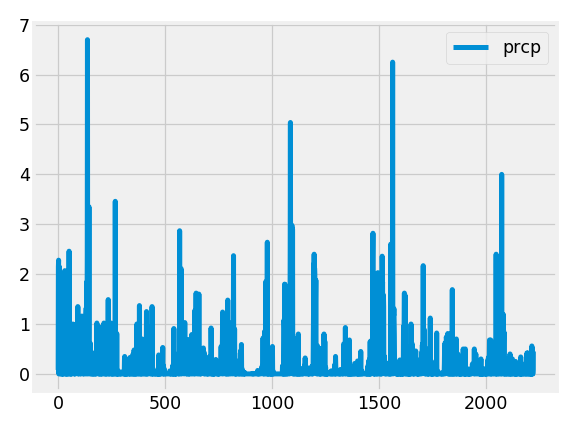

In [32]:
#Plot the results using the DataFrame plot method.
weather_df.plot()

#plt.xticks(arange(8), weather_df['date'], rotation='45')
plt.tight_layout ()
plt.show()


In [10]:
#Use Pandas to print the summary statistics for the precipitation data.
weather_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


#  Station Analysis 

In [11]:
#Design a query to calculate the total number of stations.
session.query(Station.name).count()

9

In [12]:
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
measurement_data= session.query(Measurement.station, Measurement.tobs).all()
measure_df = pd.DataFrame(measurement_data)
obs_counts= measure_df.groupby('station').count()
obs_counts= obs_counts.sort_values('tobs', ascending=False)
obs_counts

,tobs
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [13]:
# Latest Date
latest_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [14]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[('54', '85', 71.66378066378067)]

In [15]:
import datetime as dt
from pandas.plotting import table
prev_year = dt.date.today() - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
tobs_df = pd.DataFrame(results, columns=['tobs'])
tobs_df['tobs'] = tobs_df.tobs.astype(float)
tobs_df.head()
tobs_df.dtypes


tobs    float64
dtype: object

<IPython.core.display.Javascript object>


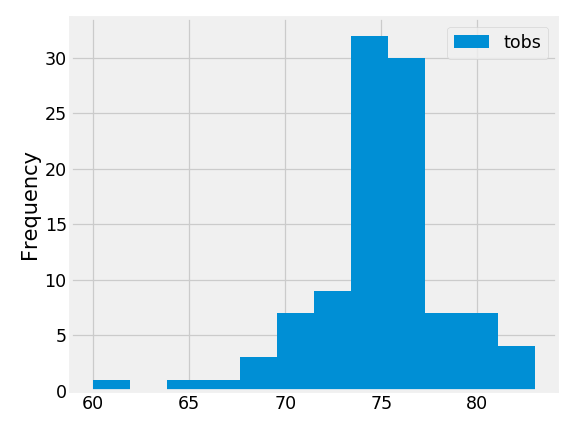

In [18]:
tobs_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()

# Temperature Analysis 

In [19]:
#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d
def calc_temps(start_date, end_date):
    """MIN, AVG, and MAX temp records for dates specified by the user.
    Arguments:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d  
    Returns:
        TMIN, TAVG, and TMAX temperature for dates specified by the user    """    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-08-01', '2017-08-015'))

[('72', 74.5, '77')]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
import datetime as dt

prev_year_start = dt.date(2017, 8, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2017, 8, 1) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
tmin= int(tmin)
tmax= int(tmax)
print(tmin, tavg, tmax,type(tmax))

73 76.16666666666667 78 <class 'int'>


<IPython.core.display.Javascript object>


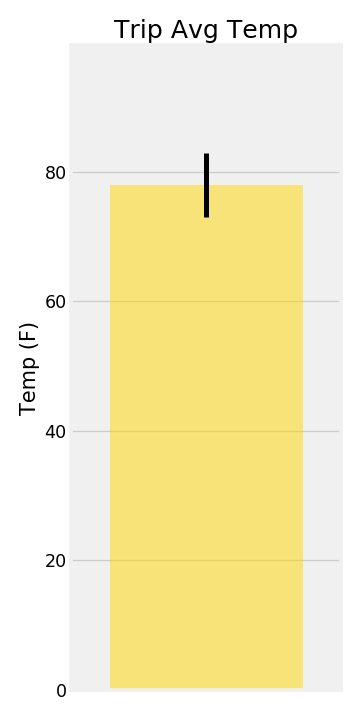

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='gold', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)

fig.tight_layout()
fig.show()

In [33]:
The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.


Calcualte the rainfall per weather station using the previous year's matching dates.



Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.


Create a function called daily_normals that will calculate the daily normals for a specific date. This date string will be in the format %m-%d. Be sure to use all historic tobs that match that date string.
Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate the normals for each date string and append the results to a list.
Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
Use Pandas to plot an area plot (stacked=False) for the daily normals.

SyntaxError: invalid syntax (<ipython-input-33-36a2192e6b3f>, line 1)

In [ ]:
Now that you have completed your initial analysis, design a Flask api based on the queries that you have just developed.


Use FLASK to create your routes.



Routes



/api/v1.0/precipitation


Query for the dates and temperature observations from the last year.
Convert the query results to a Dictionary using date as the key and tobs as the value.
Return the json representation of your dictionary.



/api/v1.0/stations


Return a json list of stations from the dataset.



/api/v1.0/tobs


Return a json list of Temperature Observations (tobs) for the previous year



/api/v1.0/<start> and /api/v1.0/<start>/<end>


Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("08-01")

[('67', 75.54, '83')]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start = '2017-08-01'
trip_end = '2017-08-14'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')

# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[('67', 75.54, '83'),
 ('68', 75.60377358490567, '84'),
 ('70', 76.61111111111111, '85'),
 ('69', 76.71153846153847, '84'),
 ('69', 76.14814814814815, '82'),
 ('67', 76.25, '83'),
 ('71', 77.15686274509804, '83'),
 ('68', 76.5576923076923, '83'),
 ('69', 75.98039215686275, '81'),
 ('65', 76.42, '83'),
 ('67', 75.98113207547169, '82'),
 ('67', 76.52727272727273, '83'),
 ('71', 76.98245614035088, '84'),
 ('71', 76.77777777777777, '82')]

In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df['date'] = trip_dates
df.set_index(['date'],inplace=True)
df.head()

,tmin,tavg,tmax
date,,,
2017-08-01,67,75.540000,83
2017-08-02,68,75.603774,84
2017-08-03,70,76.611111,85
2017-08-04,69,76.711538,84
2017-08-05,69,76.148148,82


<IPython.core.display.Javascript object>


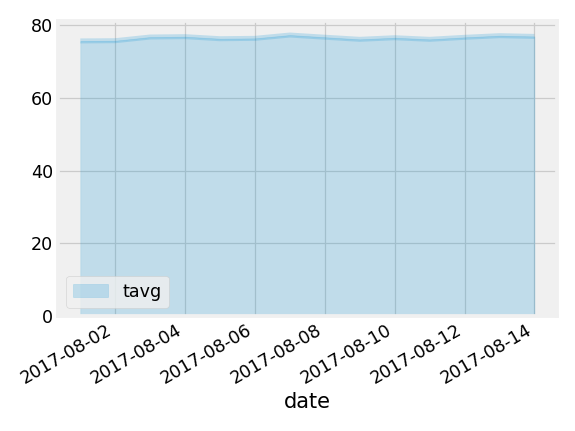

In [43]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
plt.tight_layout()
plt.show()